In [53]:
import pickle
import numpy as np
import os

In [54]:
path = "/Users/sarthakdas/Library/Mobile Documents/com~apple~CloudDocs/ComputerScience/Masters/OpenAIGym/___test"

In [55]:
# loop through path and extract all folders
folders = []
for folder in os.listdir(path):
    if os.path.isdir(os.path.join(path, folder)):
        folders.append(folder)

# from each of these folders loop through and open the pickle file
data = []
for folder in folders:
    with open (os.path.join(path, folder, "output.pkl"), 'rb') as f:
        data.append(pickle.load(f))

print(data[0].keys())

dict_keys(['config', 'data', 'sucessful'])


In [56]:
print(len(data))
data[0]["config"]["goal"]


50


[0.005599955914668886, -0.42479237674008896]

14


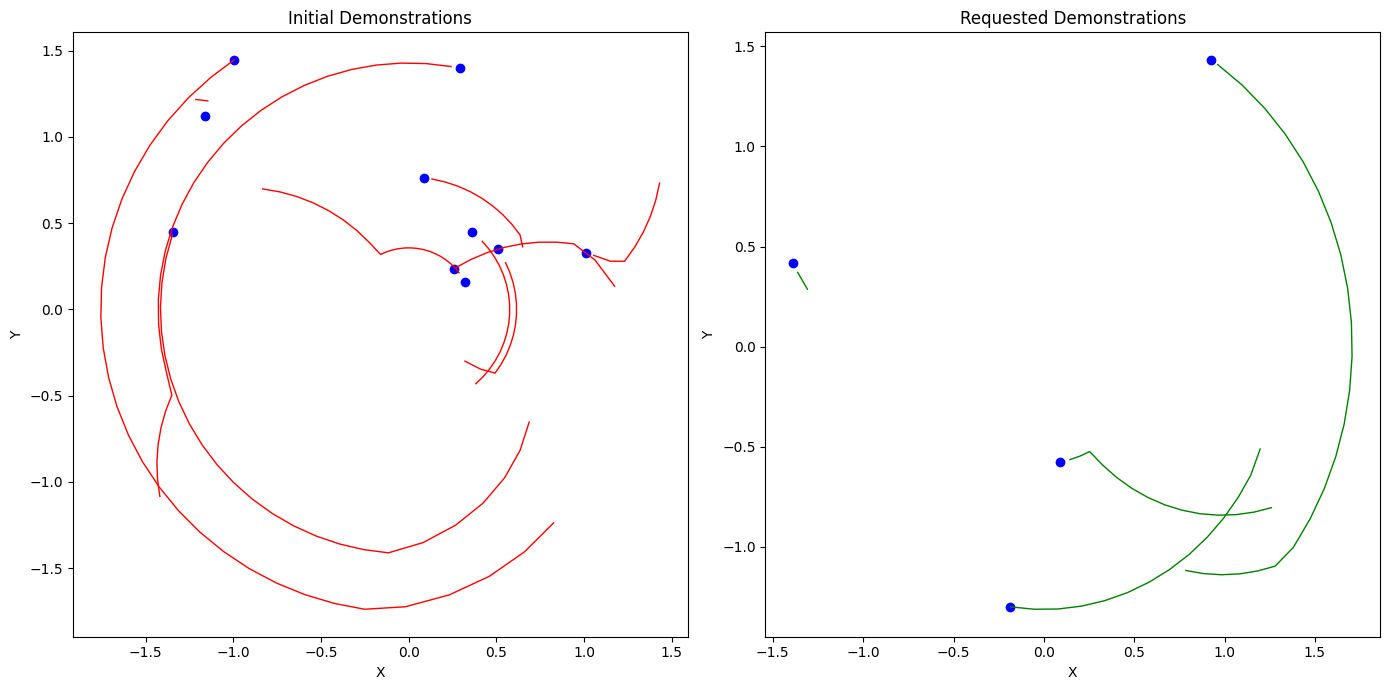

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

total = 0

# Plot the ee_states with g_y > 0 in the first subplot (ax1)
for i in range(len(data)):
    g_x = data[i]["config"]["goal"][0]
    g_y = data[i]["config"]["goal"][1]
    if g_y > 0 and i % 3 == 0:
        total += 1
        coords = np.array(data[i]["data"]["ee_states"])
        ax1.plot(coords[:, 0], coords[:, 1], 'r-', linewidth=1)  # Plot ee_states as a line
        ax1.scatter(g_x, g_y, c='b', marker='o')  # Plot the goal point

# Set titles and labels for the first subplot
ax1.set_title('Initial Demonstrations')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Plot the ee_states with g_y < 0 in the second subplot (ax2)

subset = [2,5, 8, 10]
for i in range(len(data)):
    g_x = data[i]["config"]["goal"][0]
    g_y = data[i]["config"]["goal"][1]
    if i in subset:
        total += 1
        coords = np.array(data[i]["data"]["ee_states"])
        ax2.plot(coords[:, 0], coords[:, 1], 'g-', linewidth=1)  # Plot ee_states as a line
        ax2.scatter(g_x, g_y, c='b', marker='o')  # Plot the goal point

# Set titles and labels for the second subplot
ax2.set_title('Requested Demonstrations')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Display the total number of plotted graphs
print(total)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


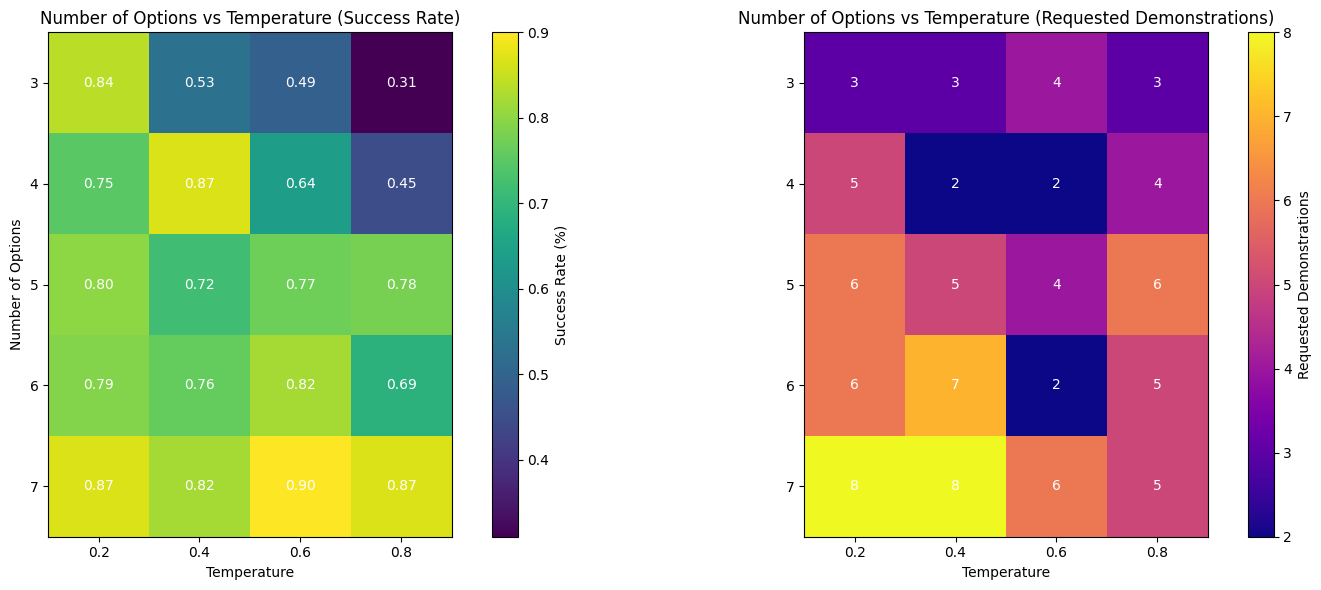

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Manually define your matrix data for success rate
success_rate_data = np.array([
    [0.84, 0.53, 0.49, 0.31],
    [0.75, 0.87, 0.64, 0.45],
    [0.80, 0.72, 0.77, 0.78],
    [0.79, 0.76, 0.82, 0.69],
    [0.87, 0.82, 0.90, 0.87]
])

# Manually define your matrix data for number of requested demonstrations
demonstrations_data = np.array([
    [3, 3, 4, 3],
    [5, 2, 2, 4],
    [6, 5, 4,6],
    [6, 7, 2, 5],
    [8, 8, 6, 5]
])

# Define the labels for the x-axis and y-axis
x_labels = ['0.2', '0.4', '0.6', '0.8']
y_labels = ['3', '4', '5', '6', '7']

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the success rate heatmap with a 'viridis' colormap
cax1 = ax[0].imshow(success_rate_data, cmap='viridis', interpolation='nearest')
fig.colorbar(cax1, ax=ax[0], label='Success Rate (%)')
ax[0].set_xticks(np.arange(len(x_labels)))
ax[0].set_xticklabels(x_labels)
ax[0].set_yticks(np.arange(len(y_labels)))
ax[0].set_yticklabels(y_labels)
ax[0].set_title('Number of Options vs Temperature (Success Rate)')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Number of Options')

# Add the numbers inside the boxes for success rate
for i in range(success_rate_data.shape[0]):
    for j in range(success_rate_data.shape[1]):
        ax[0].text(j, i, f'{success_rate_data[i, j]:.2f}', ha='center', va='center', color='white')

# Plot the demonstrations heatmap with a 'plasma' colormap
cax2 = ax[1].imshow(demonstrations_data, cmap='plasma', interpolation='nearest')
fig.colorbar(cax2, ax=ax[1], label='Requested Demonstrations')
ax[1].set_xticks(np.arange(len(x_labels)))
ax[1].set_xticklabels(x_labels)
ax[1].set_yticks(np.arange(len(y_labels)))
ax[1].set_yticklabels(y_labels)
ax[1].set_title('Number of Options vs Temperature (Requested Demonstrations)')
ax[1].set_xlabel('Temperature')

# Add the numbers inside the boxes for demonstrations
for i in range(demonstrations_data.shape[0]):
    for j in range(demonstrations_data.shape[1]):
        ax[1].text(j, i, f'{demonstrations_data[i, j]:.0f}', ha='center', va='center', color='white')

# Display the heatmaps
plt.tight_layout()
plt.show()


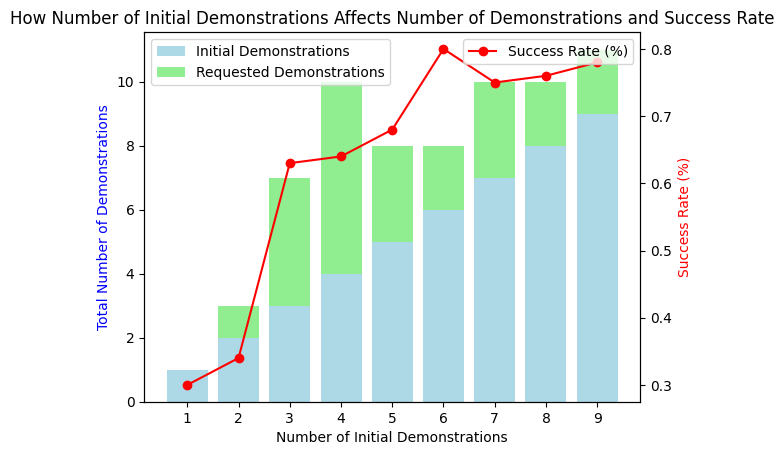

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
bar_values2 = [0,1,4,6,3,2,3,2,2]
bar_values1 = [1,2,3,4,5,6,7,8,9]
line_values = [0.3,0.34,0.63,0.64,0.68,0.8,0.75,0.76,0.78]



# Calculate the positions of the bars
index = np.arange(len(categories))  # The label locations

# Create a figure and the first axis for the bar graph
fig, ax1 = plt.subplots()

# Plot the first bar graph
ax1.bar(index, bar_values1, color='lightblue', label='Initial Demonstrations')

# Plot the second bar graph on top of the first one (stacked)
ax1.bar(index, bar_values2, bottom=bar_values1, color='lightgreen', label='Requested Demonstrations')

# Set the labels and title for the first axis
ax1.set_xlabel('Number of Initial Demonstrations')
ax1.set_ylabel('Total Number of Demonstrations', color='blue')
ax1.set_title('How Number of Initial Demonstrations Affects Number of Demonstrations and Success Rate')
ax1.set_xticks(index)
ax1.set_xticklabels(categories)

# Create the second axis for the line graph
ax2 = ax1.twinx()

# Plot the line graph on the second axis
ax2.plot(categories, line_values, color='red', marker='o', label='Success Rate (%)')

# Set the label for the second axis
ax2.set_ylabel('Success Rate (%)' , color='red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()